In [260]:

!pip install opencv-python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


filePath= r"C:\Users\faisa\Downloads\chessdataset"
  
    

Defaulting to user installation because normal site-packages is not writeable


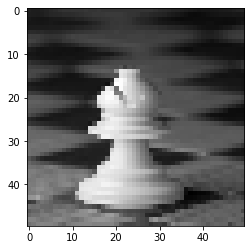

In [256]:
imagesize = 50



    

In [261]:
arraytraining = []

def init_data():
    for i in range(len(pieces)): 

        path = os.path.join(filePath,pieces[i]) 
        numberclass = i  

        for pixels in tqdm(os.listdir(path)):  
                set_pic = cv2.imread(os.path.join(path,pixels) ,cv2.IMREAD_GRAYSCALE)  
                resized = cv2.resize(set_pic, (imagesize, imagesize))  
                arraytraining.append([resized, numberclass])  
                
init_data()


100%|██████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 1991.04it/s]


In [262]:

np.random.shuffle(arraytraining)

In [263]:
for preview in arraytraining[:20]:
    print(preview[1])

1
1
1
4
1
2
1
0
1
4
1
4
4
0
1
1
1
4
4
3


In [264]:

trainX = []
trainy = []

for xis,yis, in arraytraining:
    trainX.append(xis)
    trainy.append(yis)

print(trainX[0].reshape(-1, imagesize, imagesize, 1))

trainX = np.array(trainX).reshape(-1, imagesize, imagesize, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [265]:

from tempfile import TemporaryFile

xfile = TemporaryFile() #opening a file to save all the data for re-use

np.save(xfile, trainX) #saving the data using numpy

yfile = TemporaryFile()
np.save(yfile,trainy) 



In [266]:

_= xfile.seek(0)
_= yfile.seek(0)
trainX=np.load(xfile)
trainy=np.load(yfile)

In [251]:
trainX[1]

array([[[247],
        [247],
        [247],
        ...,
        [247],
        [247],
        [247]],

       [[247],
        [247],
        [247],
        ...,
        [247],
        [247],
        [247]],

       [[247],
        [247],
        [247],
        ...,
        [247],
        [247],
        [247]],

       ...,

       [[247],
        [247],
        [247],
        ...,
        [247],
        [247],
        [247]],

       [[247],
        [247],
        [247],
        ...,
        [247],
        [247],
        [247]],

       [[247],
        [247],
        [247],
        ...,
        [247],
        [247],
        [247]]], dtype=uint8)

In [295]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator



_= xfile.seek(0) #closing  the file to load the data later 
_= yfile.seek(0)

X=np.load(xfile) # load the file of values we created
y=np.load(yfile)

X = X/255.0#this is going to normalize the data

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))  #add conv2d layer
model.add(Activation('relu')) #add activation layer
model.add(MaxPooling2D(pool_size=(2, 2))) #add pooling

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())  # 3d feature maps areconverted into 2d features 

model.add(Dense(64))

#model.add(Dense(1))

#model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(Activation('softmax'))#softmax is used for non binary data 

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
y=np.array(y)

mymodel=model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)
model.evaluate(X,y)

model.save('CNN.model')


Epoch 1/10
19/19 [==============================] - 9s 426ms/step - loss: 1.6076 - accuracy: 0.2513 - val_loss: 1.6209 - val_accuracy: 0.2727
Epoch 2/10
19/19 [==============================] - 8s 422ms/step - loss: 1.5724 - accuracy: 0.2821 - val_loss: 1.5982 - val_accuracy: 0.3333
Epoch 3/10
19/19 [==============================] - 8s 413ms/step - loss: 1.5161 - accuracy: 0.3282 - val_loss: 1.5701 - val_accuracy: 0.2576
Epoch 4/10
19/19 [==============================] - 8s 426ms/step - loss: 1.3763 - accuracy: 0.4205 - val_loss: 1.4302 - val_accuracy: 0.4394
Epoch 5/10
19/19 [==============================] - 8s 419ms/step - loss: 1.1493 - accuracy: 0.5590 - val_loss: 1.4595 - val_accuracy: 0.3485
Epoch 6/10
19/19 [==============================] - 8s 403ms/step - loss: 1.0031 - accuracy: 0.6188 - val_loss: 1.4013 - val_accuracy: 0.4545
Epoch 7/10
19/19 [==============================] - 8s 401ms/step - loss: 0.8183 - accuracy: 0.7009 - val_loss: 1.3202 - val_accuracy: 0.5909
Epoch 

INFO:tensorflow:Assets written to: CNN.model\assets


INFO:tensorflow:Assets written to: CNN.model\assets


In [296]:
import cv2
import tensorflow as tf

def maker(filepath):
    
    sizeofimg = 50  # 50 in txt-based
    readarray = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    resizedarr = cv2.resize(readarray, (sizeofimg, sizeofimg))
    x=resizedarr.reshape(-1, sizeofimg, sizeofimg, 1)
    return x


model = tf.keras.models.load_model("CNN.model")
def prediction(model):
    guess = model.predict([maker('bishop1.jpg')])
    print(guess)  # will be a list in a list.
    count=0
    for i in guess[0]:
        if(i==1.0):
            break
        else:
         count+=1
    if(count==0):
        print("bishop")
    elif(count==1):    
        print("knight")
    elif(count==2):
        print("pawn")
    elif(count==3):
        print("queen")
    elif(count==4):
        print("rook")
prediction(model)        
        
    

1/1 [==============================] - 0s 102ms/step
[[1. 0. 0. 0. 0.]]
bishop


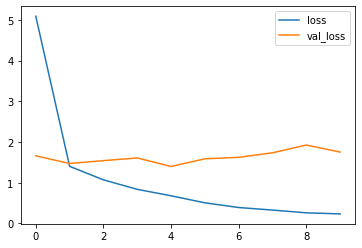

In [291]:
graph = pd.DataFrame(mymodel.history)

graph[['loss', 'val_loss']].plot()
graph[['accuracy', 'val_accuracy']].plot
plt.show()



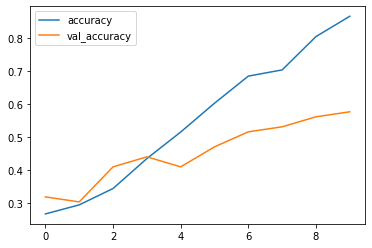

In [287]:
graph[['accuracy', 'val_accuracy']].plot()
plt.show()